# Visualization for Social Interaction

In [1]:
import numpy as np
import pandas as pd

In [2]:
test_xl = pd.read_excel('condensed.xlsx')
#test_xl

In [3]:
import ast

list_of_nodes = test_xl['Node'].tolist()

raw_list_of_base_edges = list(set(test_xl['Base Connection'].tolist()))
list_of_base_edges = [ast.literal_eval(x) for x in raw_list_of_base_edges if x == x]

list_of_add_edges = []
raw_list_of_add_edges = list(set(test_xl['Additional Connections'].tolist()))
for edge_call in raw_list_of_add_edges:
    try:
        partial_list_of_add_edges = edge_call.split(';')
        for temp_edge in partial_list_of_add_edges:
            list_of_add_edges.append(ast.literal_eval(temp_edge))
    except:
        pass

list_of_edges = list_of_base_edges + list_of_add_edges

In [4]:
alt_node_label_dict = {}
list_of_speakers = test_xl['Speaker ID'].tolist()

op_counter = 1
st_counter = 1
te_counter = 1

for node_index in range(0, len(list_of_nodes)):
    if list_of_speakers[node_index] == 'speaker':
        alt_node_label_dict[list_of_nodes[node_index]] = f'O{op_counter}'
        op_counter += 1
    elif list_of_speakers[node_index] == 'instructor':
        alt_node_label_dict[list_of_nodes[node_index]] = f'I{te_counter}'
        te_counter += 1
    else:
        alt_node_label_dict[list_of_nodes[node_index]] = f'S{st_counter}'
        st_counter += 1

In [25]:
# List of useful hex colors

hex_gray = '#8F9595'

hex_green = '#5ACC41'

hex_red = '#F34937'
hex_blue = '#3799F3'
hex_magenta = '#FF00FF'

hex_pink = '#F068E6'
hex_yellow = '#E6F337'
hex_teal = '#41CCC8'
hex_orange = '#F3BD37'
hex_purple = '#7F2CF4'

In [6]:
def present_absent_coloring(target_code_list):
    coloring_list = []

    for code in target_code_list:
        if len(code) == 2:
            coloring_list.append(hex_gray)
        else:
            coloring_list.append(hex_green)

    return coloring_list

def two_code_coloring(target_code_list, target_code_A, target_code_B):
    coloring_list = []

    for code in target_code_list: 
        if len(code) == 0:
            coloring_list.append(hex_gray)
        elif target_code_A in code and target_code_B in code:
            coloring_list.append(hex_magenta)
        elif target_code_A in code:
            coloring_list.append(hex_red)
        elif target_code_B in code: 
            coloring_list.append(hex_blue)
        else:
            coloring_list.append(hex_gray)

    return coloring_list

def one_code_coloring(target_code_list, target_code):
    coloring_list = []

    if type(target_code) == type([]):
        equiv_list = target_code
        for code in target_code_list:
            found_target = 0

            for equiv_code in equiv_list:
                if equiv_code in code:
                    found_target = 1
                    break 

            if found_target == 1:
                coloring_list.append(hex_green)
            else:
                coloring_list.append(hex_gray)
                
    else:
        for code in target_code_list:
            if len(code) == 0:
                coloring_list.append(hex_gray)
            elif target_code in code:
                coloring_list.append(hex_green)
            else:
                coloring_list.append(hex_gray)

    return coloring_list

def cross_code_coloring(target_list_1, target_code_1, target_list_2, target_code_2):
    coloring_list = []

    for index in range(0, len(target_list_1)): 
        if len(target_list_1[index]) == 0 and len(target_list_2[index]) == 0:
            coloring_list.append(hex_gray)
        elif len(target_list_1[index]) == 0 and len(target_list_2[index]) != 0:
            coloring_list.append(hex_red)
        elif len(target_list_1[index]) != 0 and len(target_list_2[index]) == 0:
            coloring_list.append(hex_blue)

        elif target_code_1 in target_list_1[index] and target_code_2 in target_list_2[index]:
            coloring_list.append(hex_magenta)

        elif target_code_1 in target_list_1[index]:
            coloring_list.append(hex_red)
        elif target_code_2 in target_list_2[index]:
            coloring_list.append(hex_blue)

        else:
            coloring_list.append(hex_gray)

        #print(f'{target_list_1[index]} {target_list_2[index]} {coloring_list[index]}')

    return coloring_list

In [7]:
import networkx as nx

In [8]:
G=nx.DiGraph()
G.add_nodes_from(list_of_nodes)
G.add_edges_from(list_of_edges)

my_pos = nx.spring_layout(G, seed = 100)

H = nx.relabel_nodes(G, alt_node_label_dict)
my_H_pos = nx.spring_layout(H, seed = 100)

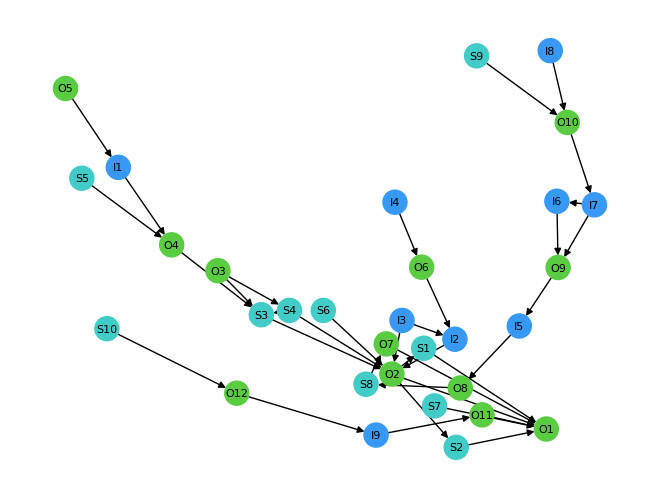

In [9]:
list_of_names = test_xl['Speaker ID'].tolist()
name_color_map = []
for name in list_of_names:
    if name == 'Sam Babb.':
        name_color_map.append(hex_green)
    elif name == 'Zackery Reed.':
        name_color_map.append(hex_blue)
    else:
        name_color_map.append(hex_teal)

nx.draw(H, pos = my_H_pos, font_size=8, with_labels=True, node_color=name_color_map)

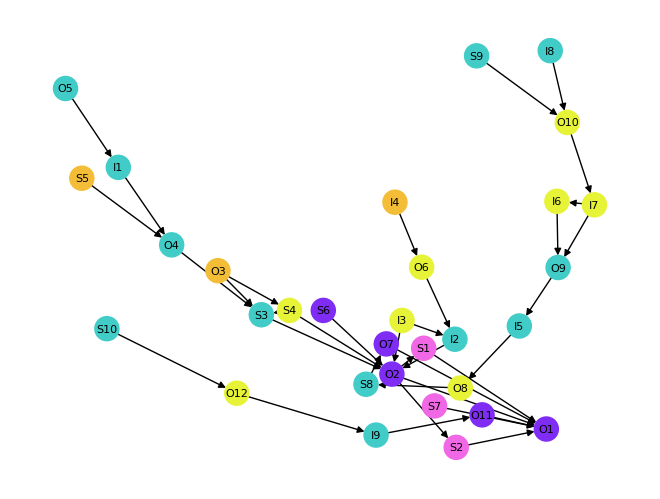

In [29]:

list_of_macro_args = test_xl['A, K, I, X, E\nMacro Arg']
macro_args_color_map = []
for temp_list in list_of_macro_args:
    if len(temp_list) == 0:
        macro_args_color_map.append(hex_gray)
    elif 'A' in temp_list:
        macro_args_color_map.append(hex_purple)
    elif 'K' in temp_list:
        macro_args_color_map.append(hex_pink)
    elif 'I' in temp_list:
        macro_args_color_map.append(hex_yellow)
    elif 'X' in temp_list:
        macro_args_color_map.append(hex_orange)
    elif 'E' in temp_list:
        macro_args_color_map.append(hex_teal)
    else:
        macro_args_color_map.append(hex_orange)

nx.draw(H, pos = my_H_pos, font_size=8, with_labels=True, node_color=macro_args_color_map)



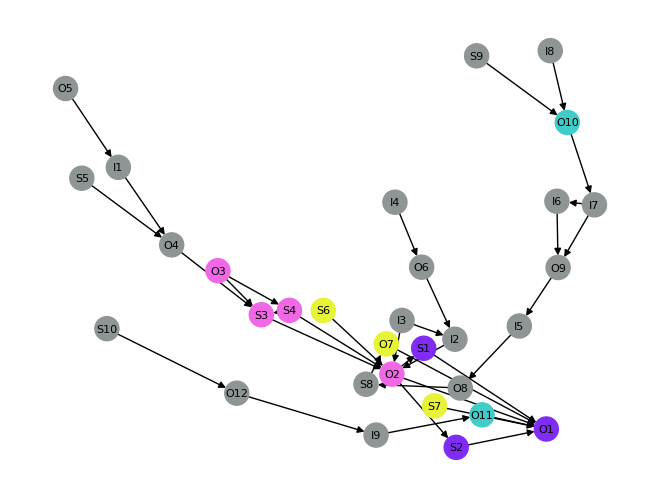

In [30]:
list_of_just = test_xl['J\nJustification']
just_color_map = []
for temp_list in list_of_just:
    if len(temp_list) == 0:
        just_color_map.append(hex_gray)
    elif 'CTXT' in temp_list:
        just_color_map.append(hex_purple)
    elif 'GEO-CHUNKY' in temp_list:
        just_color_map.append(hex_pink)
    elif 'GEO-SCALE' in temp_list:
        just_color_map.append(hex_yellow)
    elif 'GEO-CONT' in temp_list:
        just_color_map.append(hex_teal)
    else:
        just_color_map.append(hex_gray)

nx.draw(H, pos = my_H_pos, font_size=8, with_labels=True, node_color=just_color_map)

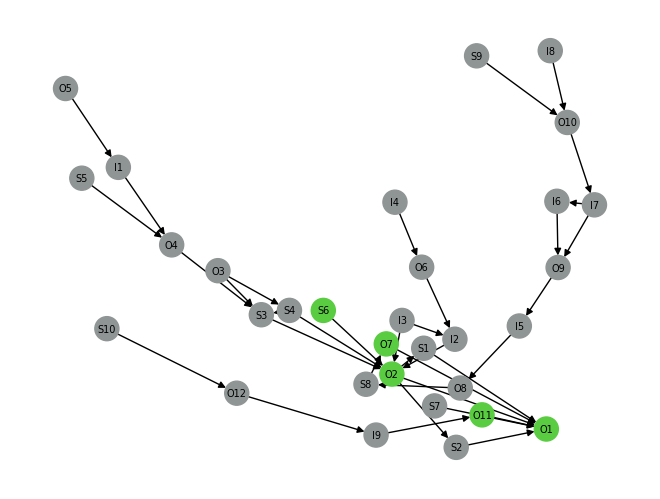

In [12]:
list_of_args = test_xl['A, K, I, X, E\nMacro Arg']
arg_color_map = one_code_coloring(list_of_args, 'A')
nx.draw(H, pos = my_H_pos, font_size=7, with_labels=True, node_color=arg_color_map)

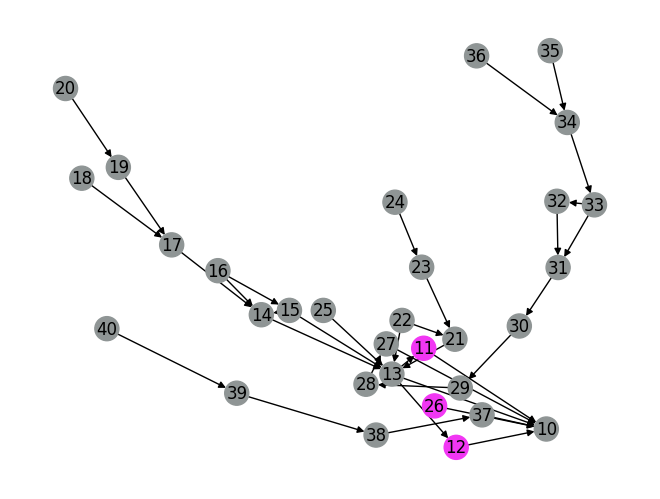

In [13]:
list_of_counterargs = test_xl['A, K, I, X, E\nMacro Arg']
counterarg_color_map = []
for temp_list in list_of_counterargs:
    if len(temp_list) == 0:
        counterarg_color_map.append(hex_gray)
    elif 'K' in temp_list:
        counterarg_color_map.append(hex_pink)
    else:
        counterarg_color_map.append(hex_gray)

nx.draw(G, pos = my_pos, with_labels=True, node_color=counterarg_color_map)

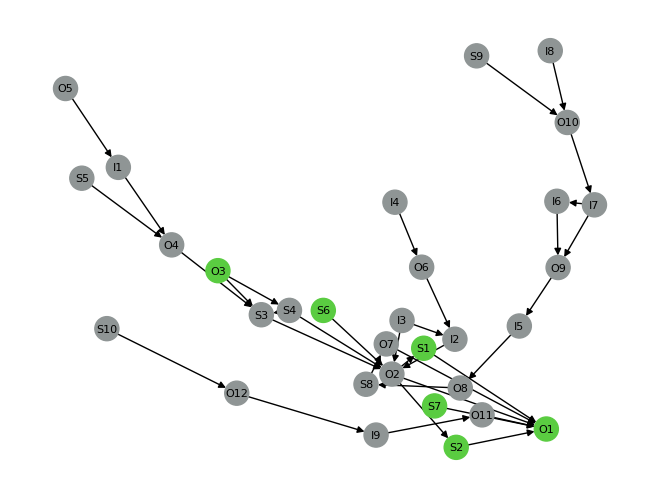

In [14]:
list_of_AROC = test_xl['AROC\nAverage Rate of Change']
nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=one_code_coloring(list_of_AROC, 'VAR'))

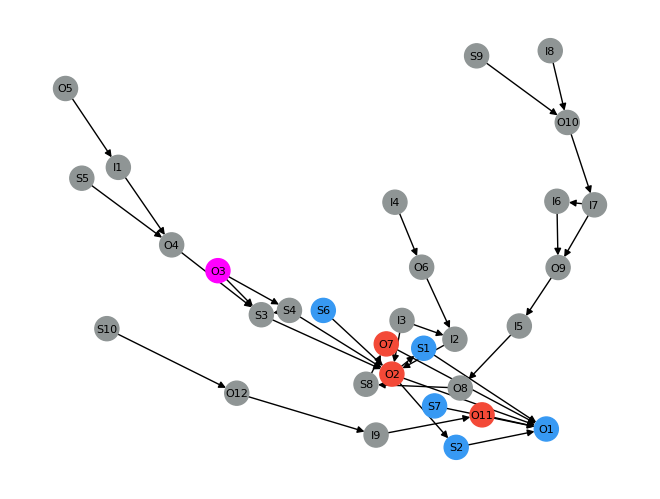

In [15]:
#nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=one_code_coloring(list_of_AROC, 'DIST'))
nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=two_code_coloring(list_of_AROC, 'DIST', 'VAR'))

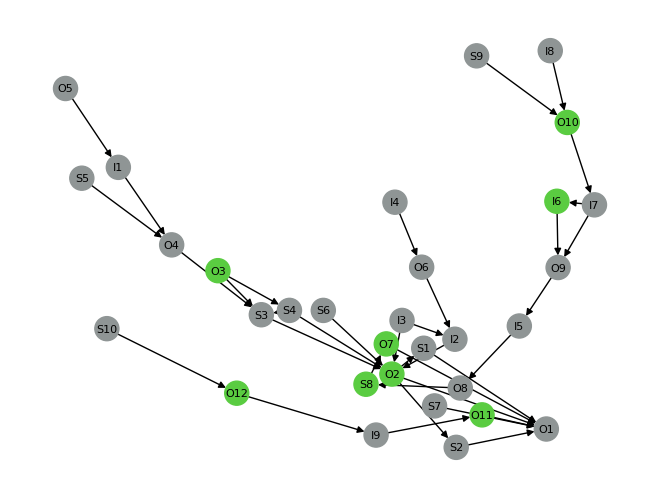

In [16]:
list_of_function = test_xl['F\nFunction']
nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=one_code_coloring(list_of_function, 'NRS'))

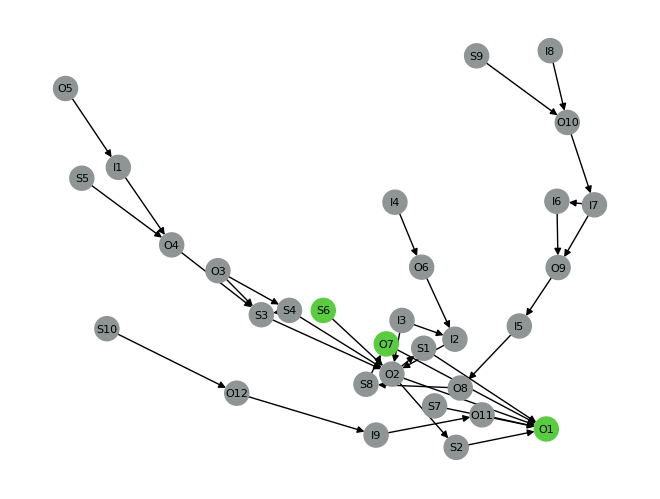

In [17]:
list_of_CROC = test_xl['CROC Constant Rate of Change ']
nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=one_code_coloring(list_of_CROC, 'GP'))

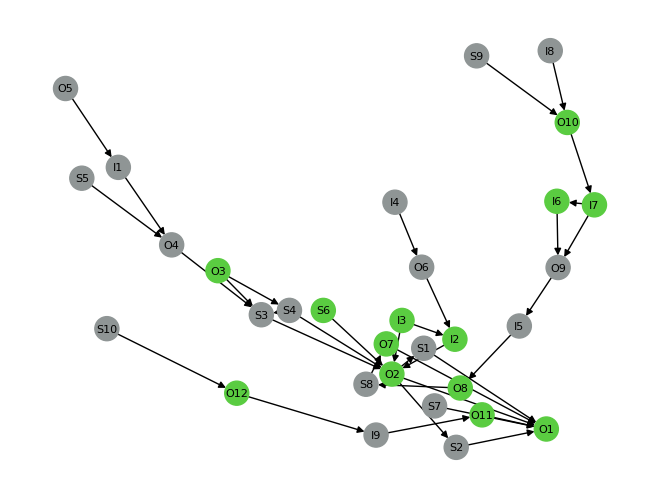

In [18]:
list_of_data_for_claim = test_xl['C, D\n Claim, Data']
claims_coloring = one_code_coloring(list_of_data_for_claim, ['D-I', 'D-G', 'D-S'])

nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=claims_coloring)

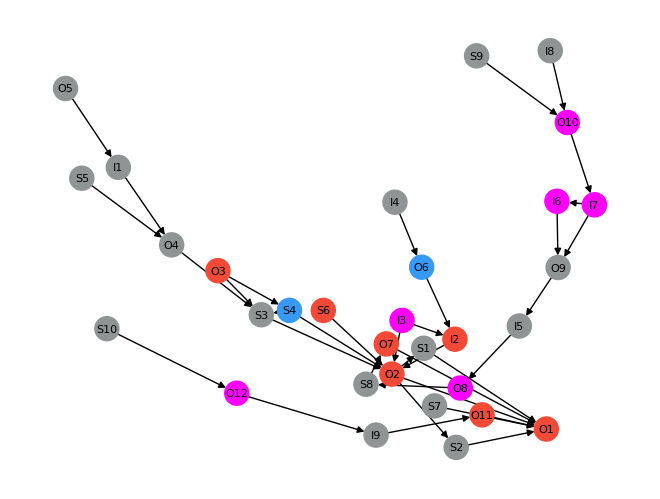

In [19]:
list_of_collapsed_data_for_claim = test_xl['Collapsed Claim Data']
mix_claims_integrative_coloring = cross_code_coloring(list_of_collapsed_data_for_claim, 'D', list_of_args, 'I')

nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=mix_claims_integrative_coloring)

In [20]:
print(test_xl.columns)

Index(['Unnamed: 0', 'Node', 'Post', 'Depth', 'Base Connection',
       'Additional Connections', 'Speaker ID', 'Analysis Unit',
       'C, D\n Claim, Data', 'Collapsed Claim Data',
       'W, B\nWarrant, Backing Warrant', 'Q, R\nQualifier, Rebuttal',
       'E\nEvaluative', 'X\nNon-arg', 'A, K, I, X, E\nMacro Arg',
       'QR Quantative Reasoning ', 'CROC Constant Rate of Change ',
       'AROC\nAverage Rate of Change', 'ROC\nAny Rate of Change',
       'D\nDerivative', 'F\nFunction', 'J\nJustification',
       'Coord\nCoordination'],
      dtype='object')


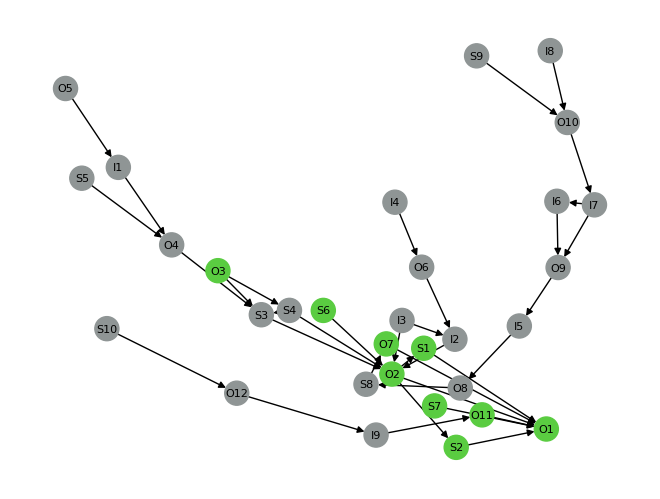

In [21]:
nx.draw(H, pos=my_H_pos, font_size=8, with_labels=True, node_color=present_absent_coloring(test_xl['AROC\nAverage Rate of Change']))